# Install và import các thư viện

In [2]:
%pip install matplotlib pandas numpy seaborn nltk geolocator scikit_learn wordcloud geopy altair

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
from pandas import DataFrame 
from pandas import Series 
import matplotlib.pyplot as plt
import json
import seaborn as sns
import numpy as np
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from wordcloud import WordCloud, STOPWORDS
from geopy.geocoders import Nominatim
import altair as alt
import csv      

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Phân tích các bài đăng dựa trên dữ liệu crawl được

## đọc dữ liệu từ file csv để phân tích

- Hàm làm sạch nội dung bài viết

In [2]:
def clean_data_message(st):
    st =  st.replace("#", '')
    st =  st.replace("\r", '')
    st =  st.replace("\n", '')
    return st


- Đọc dữ liệu từ file data.csv cho vào dataframe tên là df

In [3]:

df = pd.read_csv("data.csv")
df['message_post'] = df['message_post'].apply(clean_data_message)# làm sạch 1 lần nữa message_post (do đọc từ file nên gây ra 1 vài chi tiết nhỏ như "\n" và "\r" trong message_post)


- DataFrame df

| Các trường dữ liệu | Kiểu dữ liệu | Sơ bộ về dữ liệu trong trường |
| --- | --- | --- |
| message_post | object | chuỗi mô tả về nội dung của bài viết |
| id_post | object | đường link facebook của bài viết |
| time_created | object | thời gian đăng bài chi tiết |
| hours_time_created | int64 | thời gian đăng bài theo giờ | 
| total_comments | int64 | tổng số comment của bài viết | 
| total_of_reactions | int64 | tổng số reactions của bài viết |
| reactions_like | int64 | tổng số reactions like của bài viết | 
| reactions_love | int64 | tổng số reactions love của bài viết | 
| reactions_wow | int64 | tổng số reactions wow của bài viết | 
| reactions_haha | int64 | tổng số reactions haha của bài viết | 
| reactions_sad | int64 | tổng số reactions sad của bài viết | 
| reactions_angry | int64 | tổng số reactions angry của bài viết | 
| total_share | int64 | tổng số share của từng bài viết | 
| comments_details | object | trong list là tất cả các comment của bài viết, mỗi comment là 1 dict |
| source_picture | object | đường link đến ảnh |
| source_video | object | đường link đến video | 
| len_video | object | độ dài của video (nếu có ) trong mỗi bài viết | 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   message_post        500 non-null    object
 1   id_post             500 non-null    object
 2   time_created        500 non-null    object
 3   hours_time_created  500 non-null    int64 
 4   total_comments      500 non-null    int64 
 5   total_of_reactions  500 non-null    int64 
 6   reactions_like      500 non-null    int64 
 7   reactions_love      500 non-null    int64 
 8   reactions_wow       500 non-null    int64 
 9   reactions_haha      500 non-null    int64 
 10  reactions_sad       500 non-null    int64 
 11  reactions_angry     500 non-null    int64 
 12  total_share         500 non-null    int64 
 13  comments_details    500 non-null    object
 14  source_picture      498 non-null    object
 15  source_video        337 non-null    object
 16  len_video           500 no

In [5]:
df 

,message_post,id_post,time_created,hours_time_created,total_comments,total_of_reactions,reactions_like,reactions_love,reactions_wow,reactions_haha,reactions_sad,reactions_angry,total_share,comments_details,source_picture,source_video,len_video
0,Không mất tiền nhổ răng luôn shopdochoi758,facebook.com/1521822118121953_676296991300827,2023-11-16T02:00:28+0000,2,11,335,121,2,0,209,3,0,3,"[{'name': 'Lê Đức', 'id': '100009709843963', '...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:37
1,Đây mới là tạo hình hoàng tử Yan chuẩn nguyên ...,facebook.com/1521822118121953_675935948003598,2023-11-15T13:30:00+0000,13,7,2944,2900,6,0,38,0,0,0,"[{'name': 'Lê Lợi', 'id': '100010519566069', '...",https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,NaN,0
2,Dạy con khi bình thường và trang điểm khác nha...,facebook.com/1521822118121953_675758561354670,2023-11-15T13:00:20+0000,13,62,2660,1229,12,2,1400,17,0,21,"[{'name': 'Nguyễn Thành Hiển', 'id': '10000381...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:42
3,Học thuộc liền nào các chị em ominhbim,facebook.com/1521822118121953_675738608023332,2023-11-15T09:00:05+0000,9,610,8210,2924,25,13,4805,440,3,286,"[{'name': 'Nguyễn Thành Hiển', 'id': '10000381...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,01:14
4,Quá ngầu luôn anh trai,facebook.com/1521822118121953_675738158023377,2023-11-15T07:00:56+0000,7,259,10986,4858,39,21,5997,71,0,316,"[{'name': 'Nguyễn Thành Hiển', 'id': '10000381...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Hỏi khó thế ai trả lời được,facebook.com/1521822118121953_636843611912832,2023-09-03T09:00:00+0000,9,40,213749,96104,540,255,115454,1389,7,3,"[{'name': 'Thiên Du', 'id': '100002796085825',...",https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,NaN,0
496,Bao giờ mới giàu anh em nhỉ Minh Phúc,facebook.com/1521822118121953_636844955246031,2023-09-03T08:00:16+0000,8,1519,42592,19195,697,42,22306,342,10,1045,"[{'name': 'Thiên Du', 'id': '100002796085825',...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:55
497,Quê là quê dữ chưa,facebook.com/1521822118121953_636842755246251,2023-09-03T07:00:01+0000,7,11,158767,62837,619,160,93708,1423,20,3,"[{'name': 'Thuỳ Mai', 'id': '100030285259192',...",https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,NaN,0
498,Cái tay cầm gì thế kia :))) Đinh Mạnh,facebook.com/1521822118121953_636790928584767,2023-09-03T04:06:04+0000,4,6959,7073,3607,21,5,3397,42,1,1017,"[{'name': 'Thuỳ Mai', 'id': '100030285259192',...",https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...,https://scontent.fhan2-4.fna.fbcdn.net/v/t42.1...,00:51


## Bài viết có lượt tương tác lớn nhất trong bộ dữ liệu

In [6]:
#link bài viết có lượt tương tác lớn nhất(trong 500 bài viết gần đây)
print(df[df['total_of_reactions']==df['total_of_reactions'].max()]['id_post'].values[0])

facebook.com/1521822118121953_675227631407763


In [34]:

# bài viết có lượt tương tác lớn nhất(trong 500 bài viết gần đây)
df[df['total_of_reactions']==df['total_of_reactions'].max()]
feed_max_reactions = df[df['total_of_reactions']==df['total_of_reactions'].max()].iloc[0]['total_comments':'total_share']
feed_max_reactions


total_comments         14621
total_of_reactions    246028
reactions_like        121270
reactions_love          1271
reactions_wow            319
reactions_haha        122182
reactions_sad            962
reactions_angry           24
total_share             7223
Name: 11, dtype: object

- Trung bình total_comments của các bài viết trong bộ dữ liệu

In [156]:
mean_comments = df['total_comments'].mean()
mean_comments

2301.29

- Trung bình share của các bài viết trong bộ dữ liêu

In [65]:
mean_share = df['total_share'].mean()
mean_share

721.58

- Trung bình các reactions và trung bình tổng reactions của các bài viết trong bộ dữ liệu 

In [77]:
mean_like = df['reactions_like'].mean()
mean_love = df['reactions_love'].mean()
mean_wow = df['reactions_wow'].mean()
mean_haha = df['reactions_haha'].mean()
mean_sad = df['reactions_sad'].mean()
mean_angry = df['reactions_angry'].mean()
mean_reactions = df['total_of_reactions'].mean()
series_mean = pd.Series({'like':mean_like, 'love':mean_love, 'wow': mean_wow, 'haha':mean_haha, 'sad':mean_sad, 'angry': mean_angry})
series_mean

like     25831.588
love       283.988
wow        210.740
haha     31182.308
sad       1304.712
angry       10.410
dtype: float64

- Số lượng của các tương tác của bài viết có lượng tương tác lớn nhất trong bộ dữ liệu và trung bình của các bài viết trong bộ dữ liệu

In [154]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

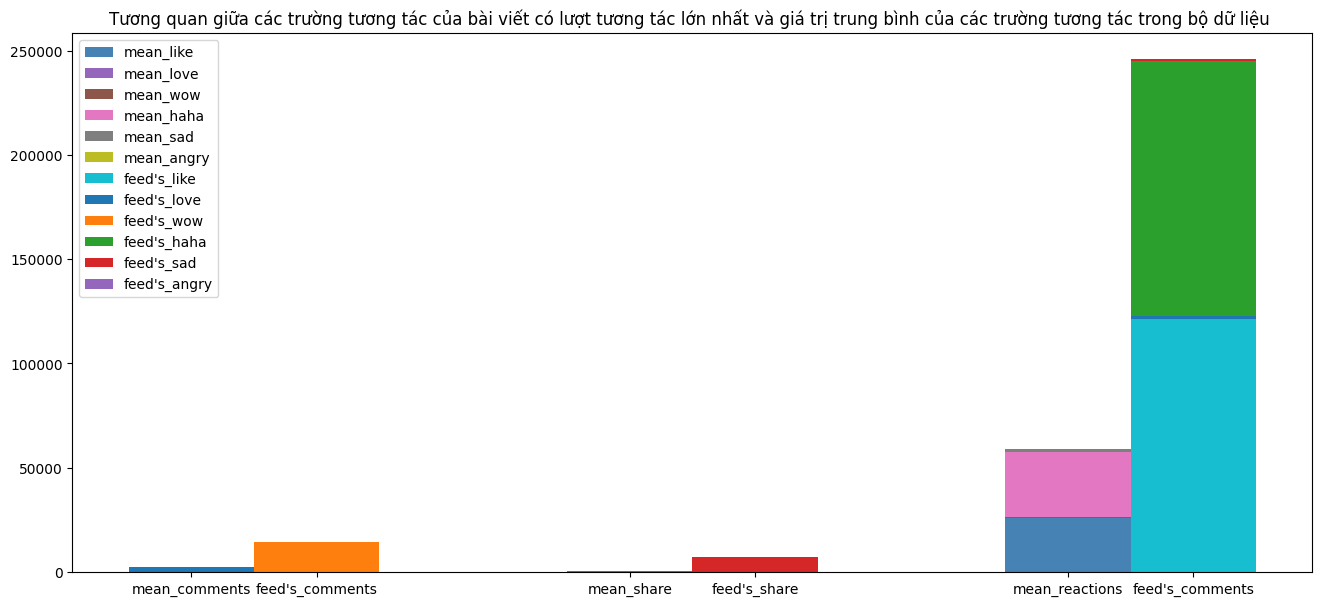

In [190]:
fig__1, ax__1 = plt.subplots()
x = [0.6,1,2,2.4,3.4,3.8]
width__ = 0.4
mean_total = [mean_comments, mean_share, mean_like, mean_love,  mean_wow , mean_haha, mean_sad, mean_angry]
this_feed = [feed_max_reactions['total_comments'],feed_max_reactions['total_share'], feed_max_reactions['reactions_like'] , feed_max_reactions['reactions_love'],
 feed_max_reactions['reactions_wow'],feed_max_reactions['reactions_haha'],feed_max_reactions['reactions_sad'],feed_max_reactions['reactions_angry']]
ax__1.bar(x = 0.6 ,height = mean_comments ,width=width__)
ax__1.bar(x = 1, height=feed_max_reactions['total_comments'],width=width__)
ax__1.bar(x = 2,height= mean_share , width = width__)
ax__1.bar(x = 2.4,height= feed_max_reactions['total_share'],width=width__)
ax__1.bar(x = 3.4, height= mean_like, width=width__, label = 'mean_like', color = 'steelblue')
ax__1.bar(x = 3.4, height= mean_love, width=width__ , bottom= mean_like, label = 'mean_love')
ax__1.bar(x = 3.4, height= mean_wow, width=width__ , bottom= mean_like + mean_love, label = 'mean_wow')
ax__1.bar(x = 3.4, height= mean_haha, width=width__ , bottom= mean_like + mean_love + mean_wow, label = 'mean_haha')
ax__1.bar(x = 3.4, height= mean_sad, width=width__ , bottom= mean_like + mean_love + mean_wow + mean_haha, label= 'mean_sad')
ax__1.bar(x = 3.4, height= mean_angry, width=width__ , bottom= mean_like + mean_love + mean_wow + mean_haha + mean_sad, label = 'mean_angry')
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_like'], width=width__, label = "feed's_like")
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_love'], width=width__ , bottom= feed_max_reactions['reactions_like'], label = "feed's_love")
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_wow'], width=width__ , bottom= feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'], label = "feed's_wow")
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_haha'], width=width__ , bottom= feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'], label = "feed's_haha")
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_sad'], width=width__ , bottom= feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'] + feed_max_reactions['reactions_haha'], label = "feed's_sad")
ax__1.bar(x = 3.8, height= feed_max_reactions['reactions_angry'], width=width__ , bottom= feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'] + feed_max_reactions['reactions_haha'] + feed_max_reactions['reactions_sad'], label = "feed's_angry")
fig__1.set_figwidth(16)
fig__1.set_figheight(7)
ax__1.set_title('Tương quan giữa các trường tương tác của bài viết có lượt tương tác lớn nhất và giá trị trung bình của các trường tương tác trong bộ dữ liệu ')
ax__1.set_xticks(x,['mean_comments', "feed's_comments",'mean_share',"feed's_share",'mean_reactions',"feed's_comments"])
ax__1.legend()

- Từ biểu đồ ta thấy số lượng comments, share, like, haha vượt trội so với trung bình các trường tương tác trong các bài viết trong bộ dữ liệu, với lượng tương tác haha gấp nhiều lần so với trung bình thì đây là bài viết mang tính hài hước, giải trí rất cao, nôi dung phù hợp với cuộc sống, với xu hướng hiện tại

- Biểu đồ thể hiện chi tiết tổng số reactions, chi tiết reactions, tổng số comments, share của bài viết này

Text(0.5, 1.0, 'Chi tiết về tương tác của bài viết có lượt tương tác nhiều nhất trong bộ dữ liệu')

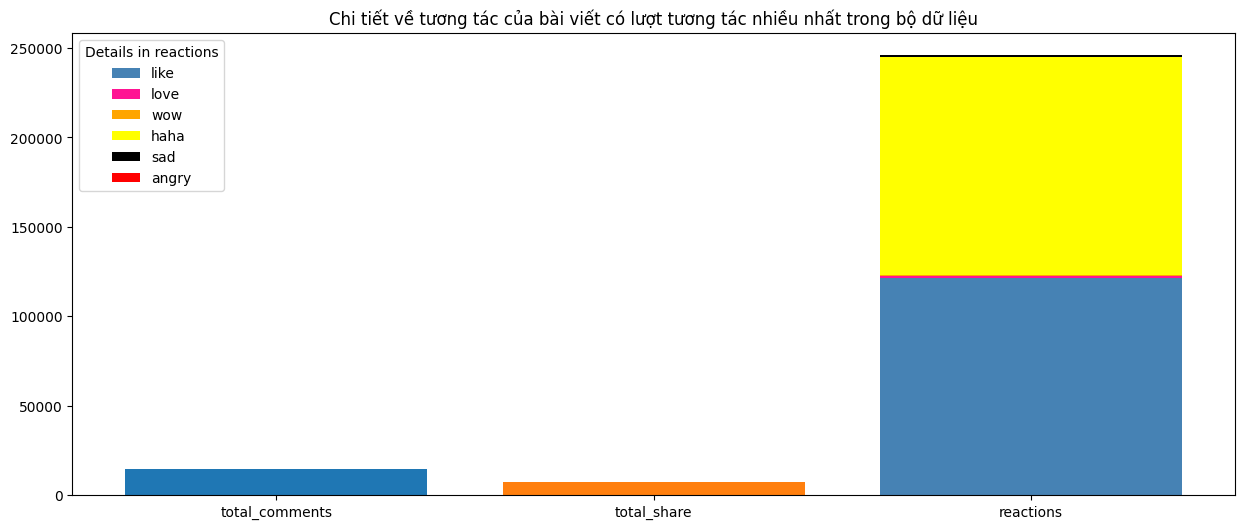

In [60]:
fig_fmax, ax_fmax = plt.subplots(1,1)
ax_fmax.bar(x= 'total_comments',height=feed_max_reactions['total_comments'])
ax_fmax.bar(x= 'total_share', height=feed_max_reactions['total_share'])
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_like'] ,color = 'steelblue',label = 'like')
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_love'] , bottom=feed_max_reactions['reactions_like'],color = 'deeppink',label = 'love')
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_wow'] , bottom=feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'],color = 'orange',label = 'wow')
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_haha'] , bottom=feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'],color = 'yellow', label = 'haha')
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_sad'] , bottom=feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'] + feed_max_reactions['reactions_haha'],color = 'black',label = 'sad')
ax_fmax.bar(x = 'reactions',height=feed_max_reactions['reactions_angry'] , bottom=feed_max_reactions['reactions_like'] + feed_max_reactions['reactions_love'] + feed_max_reactions['reactions_wow'] + feed_max_reactions['reactions_haha'] + feed_max_reactions['reactions_sad'],color = 'r',label = 'angry')
ax_fmax.legend().set_title('Details in reactions')
fig_fmax.set_figwidth(15)
fig_fmax.set_figheight(6)
ax_fmax.set_title('Chi tiết về tương tác của bài viết có lượt tương tác nhiều nhất trong bộ dữ liệu')

## Thời gian đăng bài của các bài viết

In [9]:
# thời điểm trong ngày được đăng bài nhiều nhất trong 500 bài viết gần đây
print("thời điểm được đăng bài nhiều nhất trong ngày của 500 bài viết gần đây : %sh" % df['hours_time_created'].mode().iloc[0], sep = ' ')

thời điểm được đăng bài nhiều nhất trong ngày của 500 bài viết gần đây : 7h


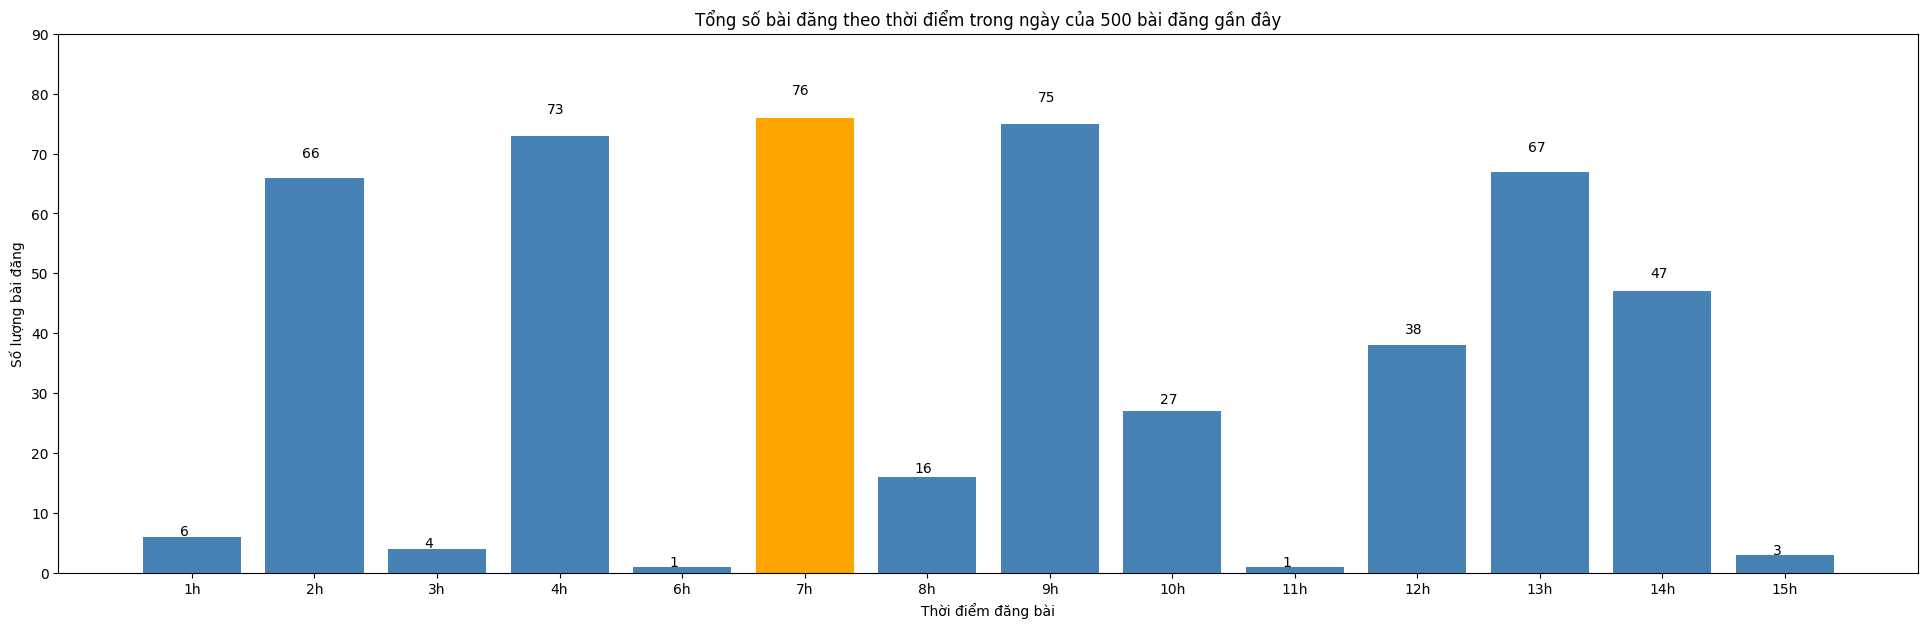

In [10]:
#lược đồ trực quan:
fig_created, ax_created = plt.subplots(1,1)
list_hours_created = list(df['hours_time_created'].value_counts().sort_index().index)
x = [(str(i) + 'h') for i in list_hours_created]
ind_cr = df['hours_time_created'].value_counts().head(1).index[0]
colorr = []
for i in list_hours_created:
    if i == ind_cr:
        colorr.append('orange')
    else:
        colorr.append('steelblue')    
ax_created.bar(x, df['hours_time_created'].value_counts().sort_index().values, color= colorr )
fig_created.set_figheight(7)
fig_created.set_figwidth(24)
ax_created.set_title('Tổng số bài đăng theo thời điểm trong ngày của 500 bài đăng gần đây')
ax_created.set_ylim(0,90)
ax_created.set_ylabel("Số lượng bài đăng")
ax_created.set_xlabel("Thời điểm đăng bài")
for p in ax_created.patches:
    ax_created.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.05))

từ biểu đồ trên ta thấy được thời điểm đăng bài viết của page này không cố định và nằm rải rác trong khoảng từ 1 giờ đêm đến 3 giờ chiều, nhưng từ 3 giờ chiều trở đi lại không có bài viết nào được đăng , từ 3 giờ chiều đến 12 giờ đêm là 9 tiếng, nên từ 1h đến 3h thì các admin của page hoạt động còn 9 tiếng còn lại không hoạt động
$\rightarrow$ page này chỉ có 1 admin

## Xu hướng comment vào thời điểm cụ thể trong ngày của user 

In [11]:
#tạo data để vẽ biểu đồ
#
data_comments = []
with open('raw_comments.json', 'r') as handler:
    data_comments = json.load(handler)
data_comments[0][0]['time_created']
#cho vào list_time_comments_Created
list_time_comments_created = []
for i in data_comments:
    for j in i:
        list_time_comments_created.append(j['time_created'])
list_time_comments_created.sort(reverse=True)        

Text(0, 0.5, 'tổng số lượng comments')

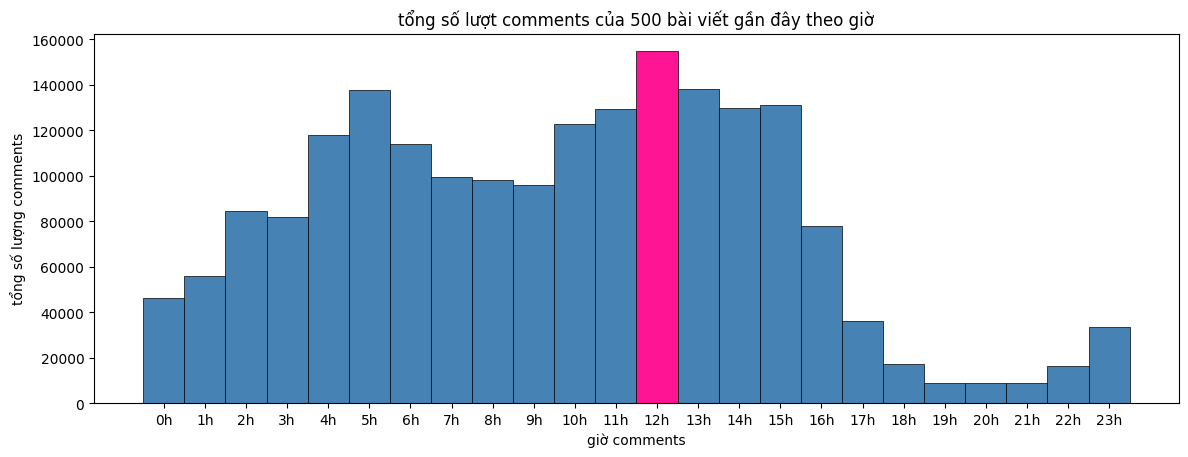

In [12]:
#biểu đồ trực quan
series_time_comments = pd.Series(list_time_comments_created)
max_comment = series_time_comments.value_counts().sort_index().max()
fig_time_comments ,ax_time_comments = plt.subplots(1,1)
y = [(str(i)+'h')for i in range (0,24)]
color_comment = []   
for i in range(24):
    if series_time_comments.value_counts().sort_index().values[i] == max_comment:
        color_comment.append('deeppink')
    else:
        color_comment.append('steelblue')           
ax_time_comments.bar(y, series_time_comments.value_counts().sort_index().values ,width=1, edgecolor="black", linewidth=0.5,color = color_comment)
fig_time_comments
fig_time_comments.set_figwidth(14)
ax_time_comments.set_title('tổng số lượt comments của 500 bài viết gần đây theo giờ')
ax_time_comments.set_xlabel('giờ comments')
ax_time_comments.set_ylabel('tổng số lượng comments')

$\rightarrow$ thời gian mà các user truy cập vào page , xem page trên facebook nhiều nhất là thời gian nghỉ trưa(khoảng từ 11h trưa đến 2h chiều) và thời gian lúc sáng sớm(4h sáng đến 6h sáng) với tần suất comment khoảng 250 người comment 1 giờ

In [13]:
#thời điểm có số lượt  comment nhiều nhất trong ngày:
print("thời điểm có số lượt comments nhiều nhất trong ngày(theo bộ dữ liệu): %sh, với tổng số lượt comments : %s"%(series_time_comments.value_counts().head(1).index[0],
                                                                                                              series_time_comments.value_counts().head(1).values[0]))

thời điểm có số lượt comments nhiều nhất trong ngày(theo bộ dữ liệu): 12h, với tổng số lượt comments : 154829


## sự thay đổi của các reactions, comments của các bài viết

- Sự tương tác trong các bài viết

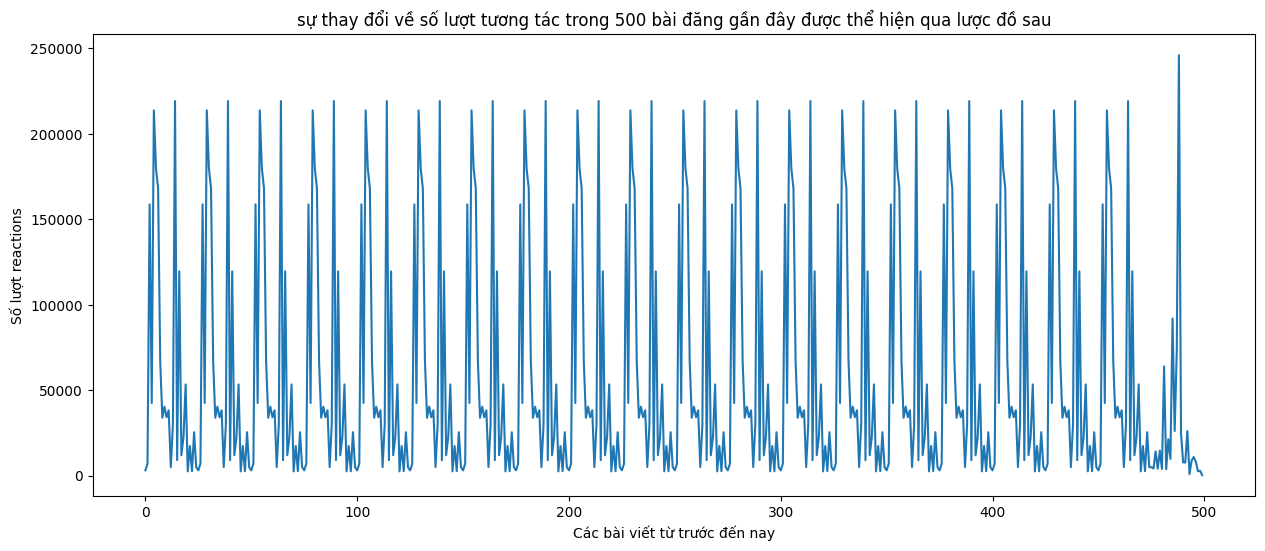

In [14]:
#sự they đổi về số lượt tương tác trong 500 bài đăng gần đây được thể hiện qua lược đồ sau
fig, ax = plt.subplots(1,1)
plot_reactions = pd.DataFrame(df['total_of_reactions'])
plot_reactions_index = plot_reactions.index
plot_reactions = plot_reactions.iloc[::-1]
plot_reactions.index = plot_reactions_index
ax.plot(plot_reactions)
ax.set_title('sự thay đổi về số lượt tương tác trong 500 bài đăng gần đây được thể hiện qua lược đồ sau')
ax.set_ylabel('Số lượt reactions')
ax.set_xlabel('Các bài viết từ trước đến nay')
fig.set_figheight(6)
fig.set_figwidth(15)
#trong lược đồ dưới đây, các bài viết theo thứ tự từ xa nhất đến gần nhất(từ trái sang phải)

dựa theo biểu đồ trên ta thấy số lượng reaction của page này có vẻ như là theo chu kỳ tăng giảm rất rõ rệt , không theo xu hướng tăng dần hay giảm dần hay quanh một lượng reaction nhất định $\rightarrow$ page này có sử dụng buff reactions

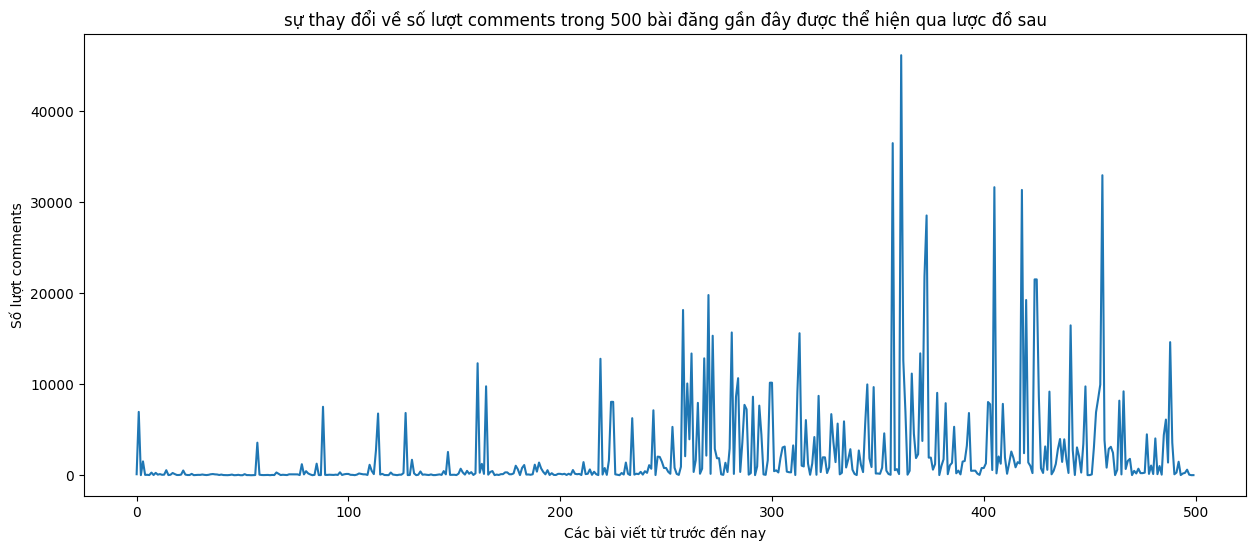

In [15]:
#sự thay đổi về số lượt comments của 500 bài đăng gần đây:
fig_cm, ax_cm = plt.subplots(1,1)
plot_reactions_cm = pd.DataFrame(df['total_comments'])
plot_reactions_cm_index = plot_reactions_cm.index
plot_reactions_cm = plot_reactions_cm.iloc[::-1]
plot_reactions_cm.index = plot_reactions_cm_index
ax_cm.plot(plot_reactions_cm)
ax_cm.set_title('sự thay đổi về số lượt comments trong 500 bài đăng gần đây được thể hiện qua lược đồ sau')
ax_cm.set_ylabel('Số lượt comments')
ax_cm.set_xlabel('Các bài viết từ trước đến nay')
fig_cm.set_figheight(6)
fig_cm.set_figwidth(15)

không như lượng reactions được buff như ở shell trước đó,  lượng comment của các bài viết trong bộ dữ liệu trông rất ngẫu nhiên $\rightarrow$ page này không sử dụng buff comment (hoặc dùng rất ít)

- reactions, comments và share

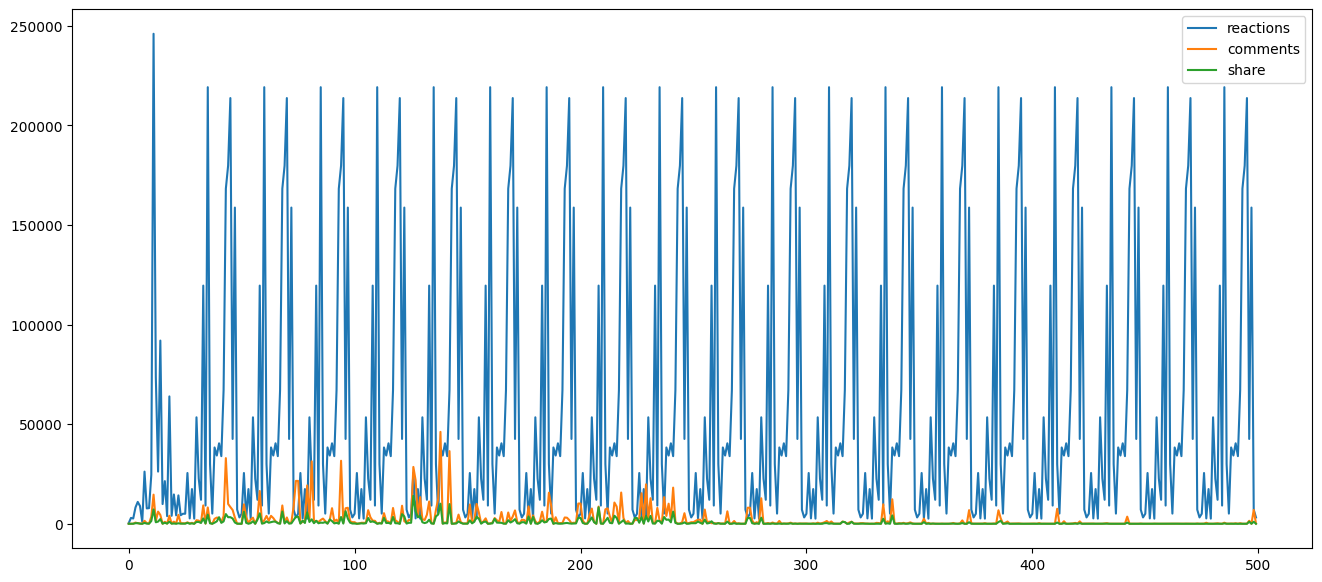

In [20]:
fig_3, ax_3 = plt.subplots(1,1)
ax_3.plot(df['total_of_reactions'],label = 'reactions')
ax_3.plot(df['total_comments'], label = 'comments')
ax_3.plot(df['total_share'],label = 'share')
ax_3.legend()
fig_3.set_figwidth(16)
fig_3.set_figheight(7)

## Tần suất xuất hiện các từ khóa và các hastag 

- Tần suất các từ khóa xuất hiện trong các bài đăng

In [16]:
# nếu sử dụng python 3.12 thì không dùng đc thư viện wordcloud nên phải dùng cách này
# #các từ khóa xuất hiện nhiều nhất trong các bài đăng
# list_keyword_and_frequency = Counter(" ".join(df['message_post']).split()).most_common(5) #lấy 5 từ
# index_lkaf = []
# value_lkaf = []
# for i in list_keyword_and_frequency:
#     index_lkaf.append(i[0])
#     value_lkaf.append(i[1])
# visualization_list_keyword_and_frequency = pd.Series(value_lkaf, index=index_lkaf)
# #lược đồ trực quan
# fig, ax = plt.subplots(1,1)
# ax.pie(visualization_list_keyword_and_frequency,shadow=True, labels=visualization_list_keyword_and_frequency.index, startangle=90, explode=(0.05,0,0,0,0),autopct='%.2f')
# ax.legend(title = '5 từ khóa xuất hiện nhiều nhất',loc=2,prop={'size':7})
# fig.set_figheight(20)#checkpoint

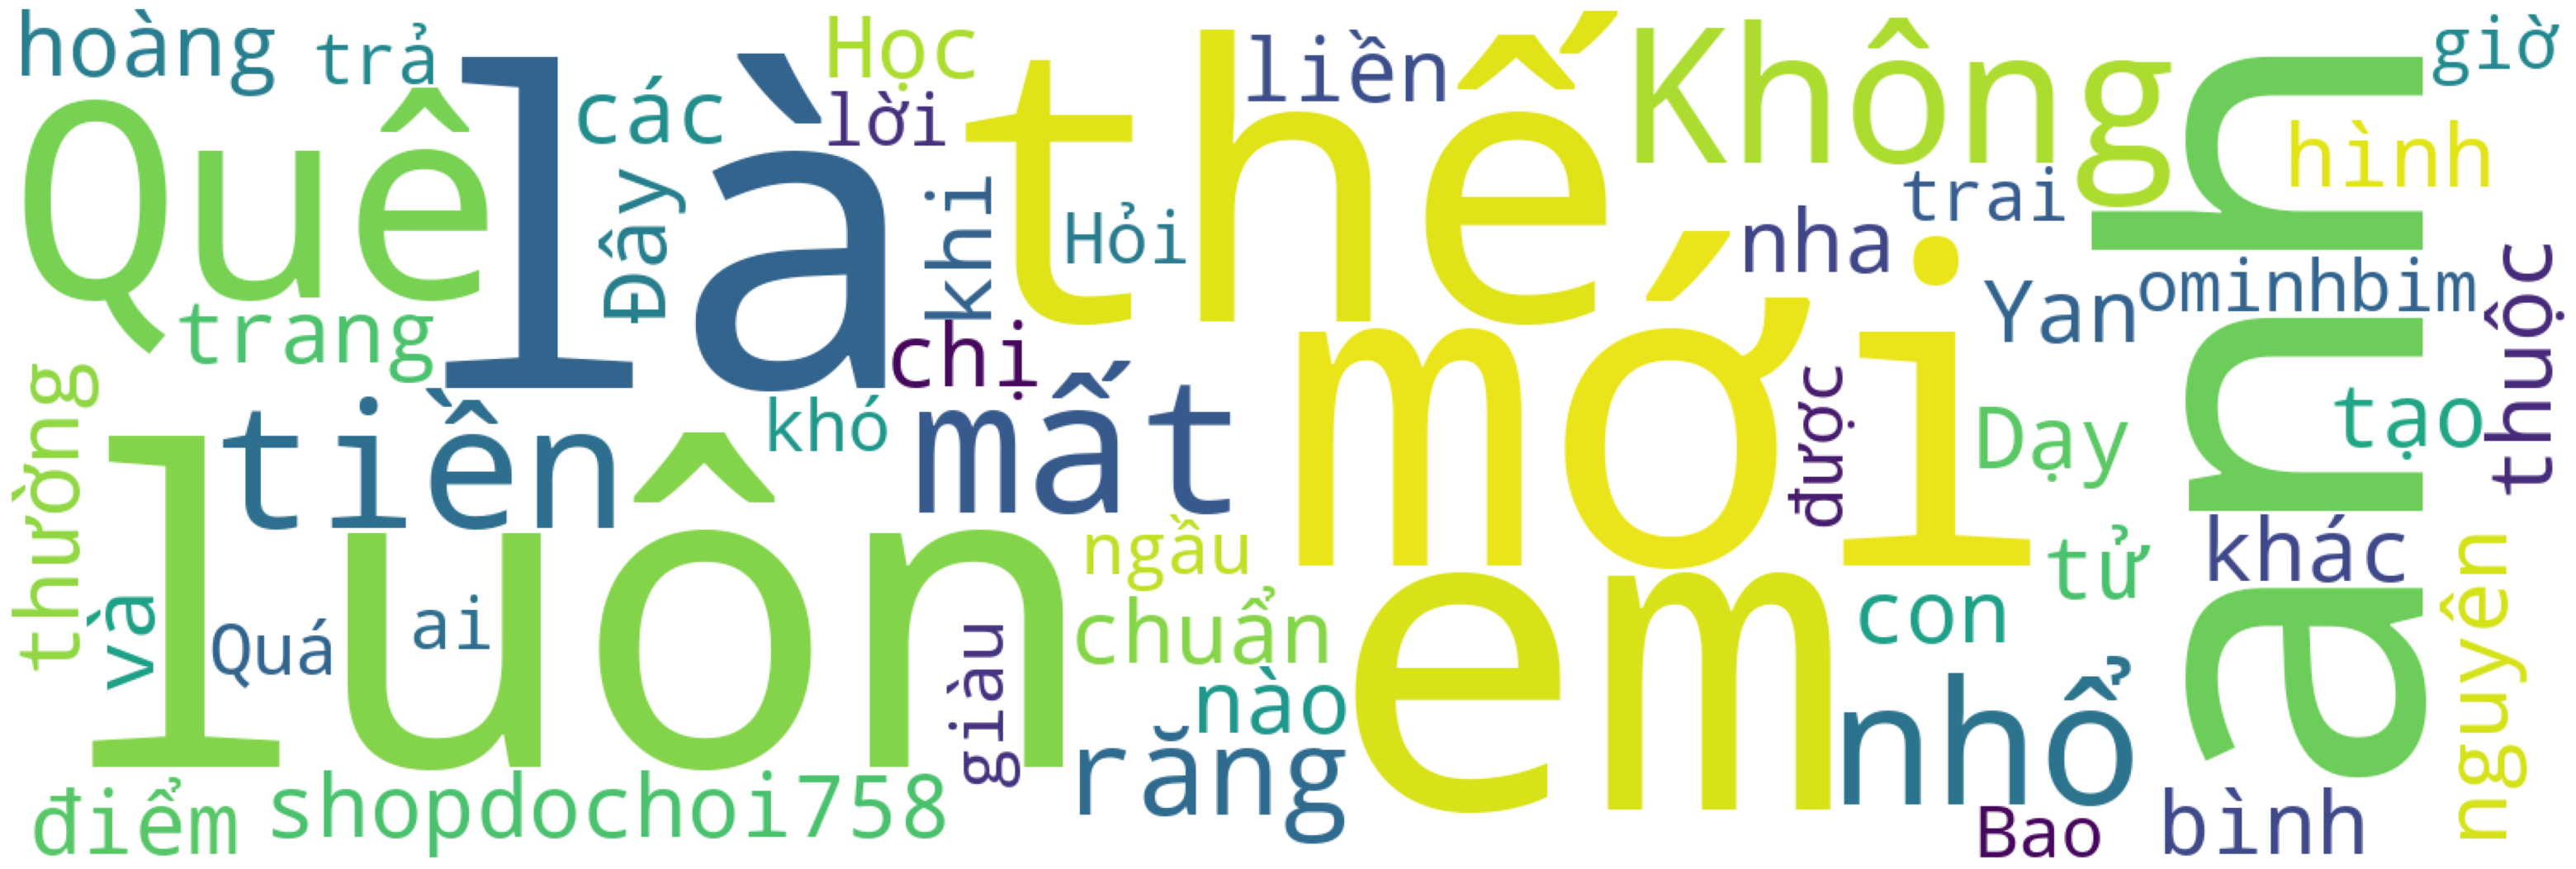

In [17]:
#các từ khóa xuất hiện nhiều nhất trong các bài đăng (sử dụng cho python 3.11 trở về trước)
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=50,
                      width=1500, height=500
                         ).generate(str(df['message_post']))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



- Tần suất hastag xuất hiện trong các bài đăng

22


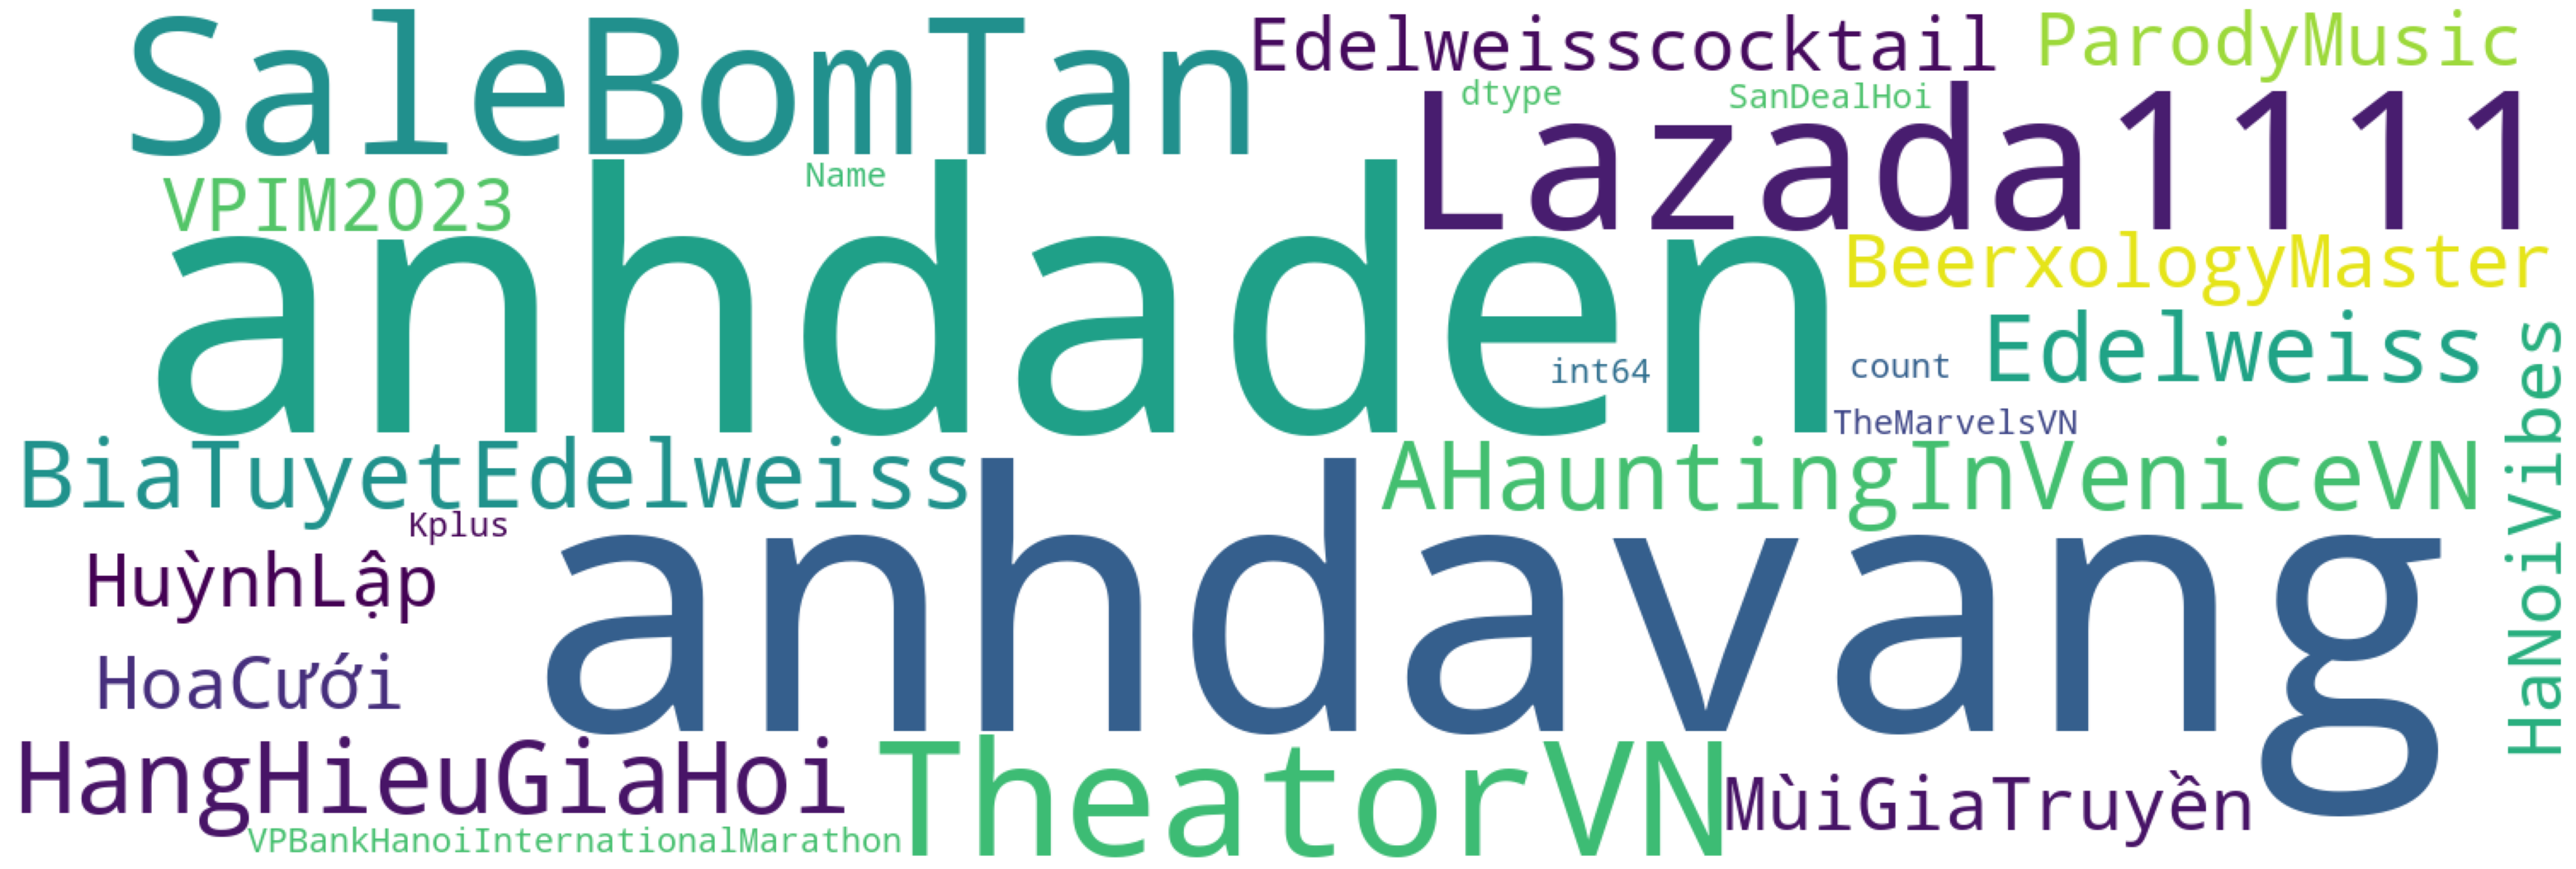

In [18]:
#tần suất xuất hiện của các hastag
list_hastag = []
with open('file_hastag.txt','r',encoding='utf8') as handler:
     list_hastag = handler.readlines()
for i in range(len(list_hastag)):
    list_hastag[i] = list_hastag[i].replace("\n",'')
series_hastag = pd.Series(list_hastag)  
print(series_hastag.value_counts().shape[0])
  # => page có ít số lượng các hastag khác nhau
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=1000,
                      width=1500, height=500
                         ).generate(str(series_hastag.value_counts()))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

  

số lượng hastag không nhiều chỉ có 22 hastag $\rightarrow$ việc quảng cáo ở page này đang còn hạn chế

## Tương quan giữa các loại reactions với nhau và với comments

- Tương quan giữa 2 loại reactions like và angry

Text(0.5, 0, 'Các bài viết')

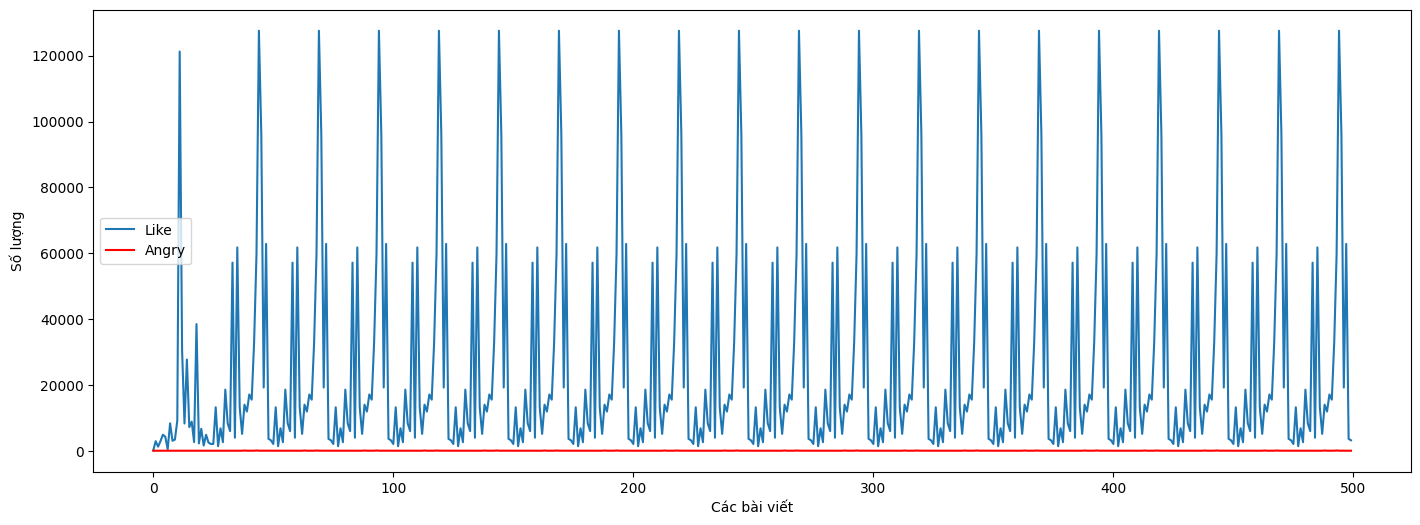

In [19]:

fig_six_at ,axis_six_at = plt.subplots(1,1)
axis_six_at.plot( df['reactions_like'],label='Like')
axis_six_at.plot(df['reactions_angry'],label='Angry',color='r')
axis_six_at.legend()
fig_six_at.set_figwidth(17)
fig_six_at.set_figheight(6)
axis_six_at.set_ylabel('Số lượng')
axis_six_at.set_xlabel('Các bài viết')

số lượng Like áp đảo rất nhiều lần so với số lượng angry theo như đồ thị thì số angry loanh quanh ở mức 0 $\rightarrow$ đây là 1 page không gây war, không tiêu cực

- Tương quan giữa 2 loại reactions haha và like

Text(0.5, 0, 'Các bài viết')

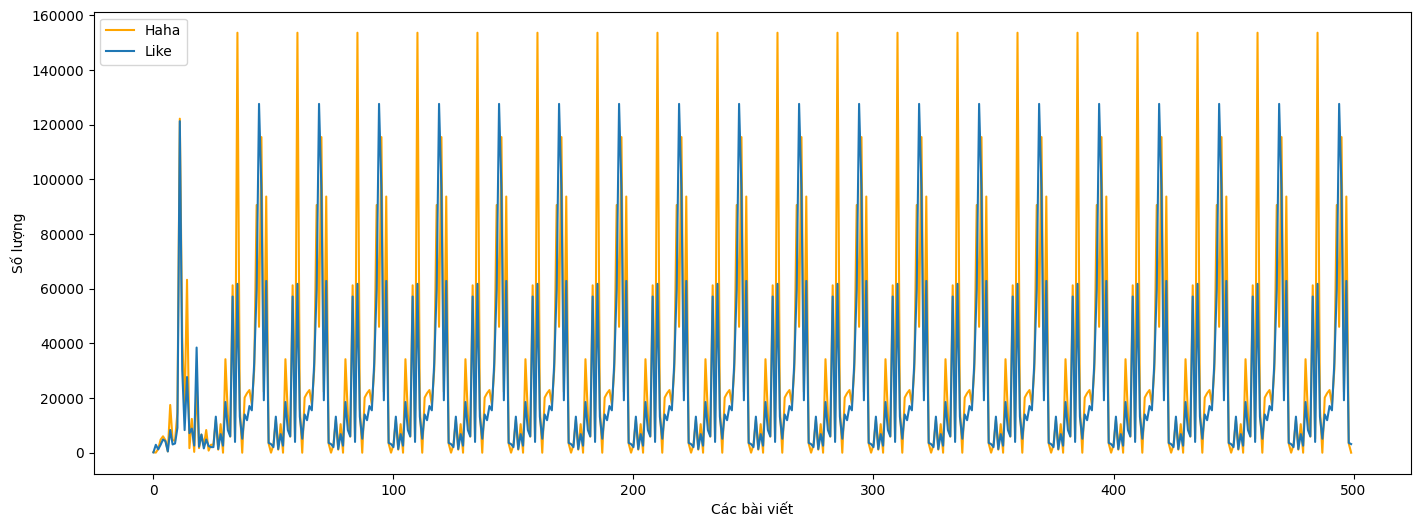

In [20]:

fig_six_at_1 ,axis_six_at_1 = plt.subplots(1,1)
axis_six_at_1.plot( df['reactions_haha'],label='Haha',color='orange')
axis_six_at_1.plot(df['reactions_like'],label='Like')
axis_six_at_1.legend()
fig_six_at_1.set_figwidth(17)
fig_six_at_1.set_figheight(6)
axis_six_at_1.set_ylabel('Số lượng')
axis_six_at_1.set_xlabel('Các bài viết')

số lượng haha còn nhiều hơn cả số lượng like $\rightarrow$ thường thì người xem sẽ ấn like rồi bỏ qua, nhưng lượng haha còn vượt trội hơn cả like nên bài viết của page có tính giải trí khá cao

- Tương quan giữa 2 loại reactions haha và love

Text(0.5, 0, 'Các bài viết')

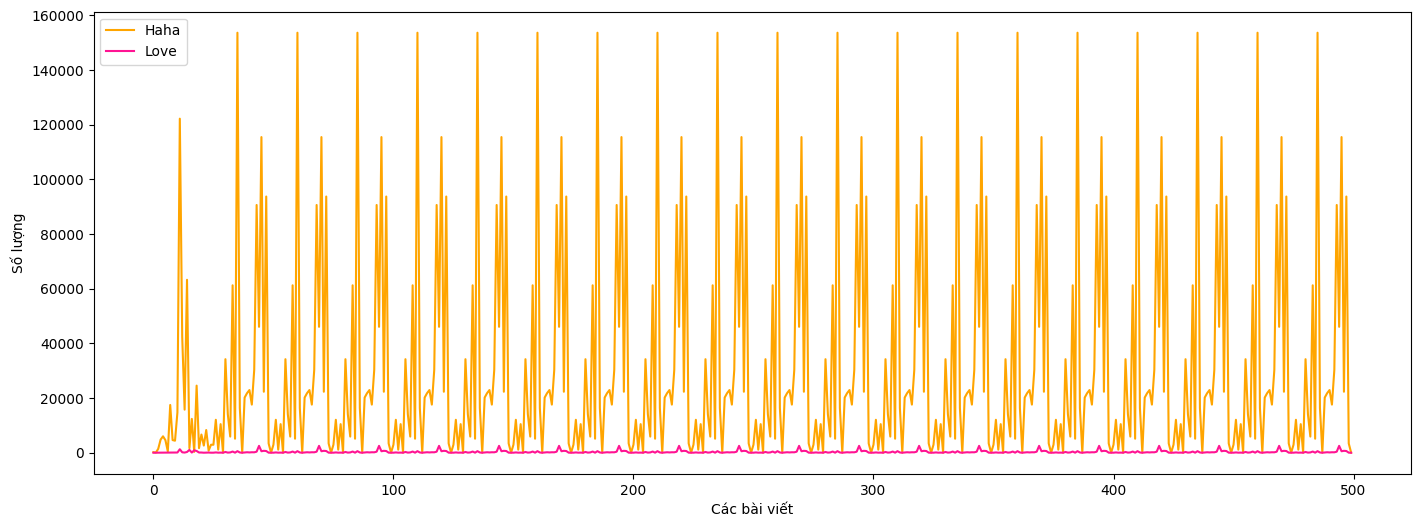

In [21]:

fig_six_at_2 ,axis_six_at_2 = plt.subplots(1,1)
axis_six_at_2.plot( df['reactions_haha'],label='Haha',color='orange')
axis_six_at_2.plot(df['reactions_love'],label='Love',color='deeppink')
axis_six_at_2.legend()
fig_six_at_2.set_figwidth(17)
fig_six_at_2.set_figheight(6)
axis_six_at_2.set_ylabel('Số lượng')
axis_six_at_2.set_xlabel('Các bài viết')

số lượng các bài viết có tính nhân văn của page hơi ít(nhân văn thì chả ai đi thả haha cả)

- Tương quan giữa số lượng reactions và số lượng comments

Text(0.5, 0, 'Các bài viết')

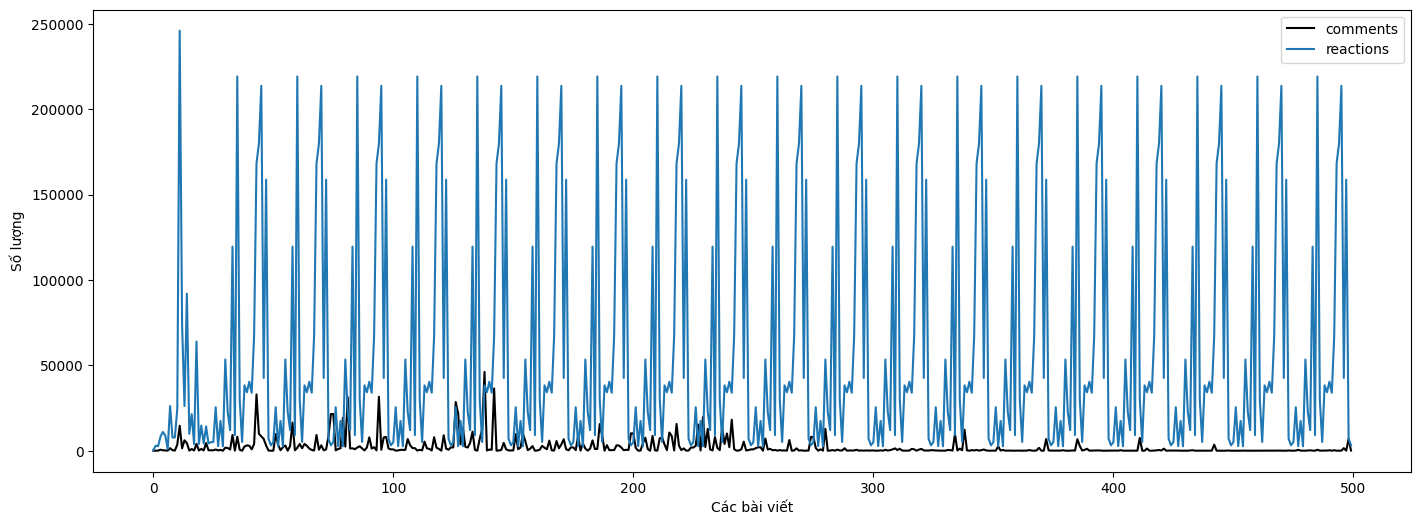

In [22]:

fig_six_at_3 ,axis_six_at_3 = plt.subplots(1,1)
axis_six_at_3.plot( df['total_comments'],label='comments', color = 'black')
axis_six_at_3.plot(df['total_of_reactions'],label='reactions')
axis_six_at_3.legend()
fig_six_at_3.set_figwidth(17)
fig_six_at_3.set_figheight(6)
axis_six_at_3.set_ylabel('Số lượng')
axis_six_at_3.set_xlabel('Các bài viết')

- Số lượt comment trung bình của 1 bài viết

In [23]:
df['total_comments'].mean()

2301.29

như đã biết ở trên thì số lượng reaction là do buff nên không có gì quá ngạc nhiên khi số lượng comment kém rất nhiều lần so với số lượt reaction nhưng số comment trung bình của 1 bài viết khoảng 2000 thì đây cũng là một con số lớn về bình luận $\rightarrow$ page này có số lượng user thực khá lớn

- lược đồ tương quan giữa từng reation với nhau

<Axes: >

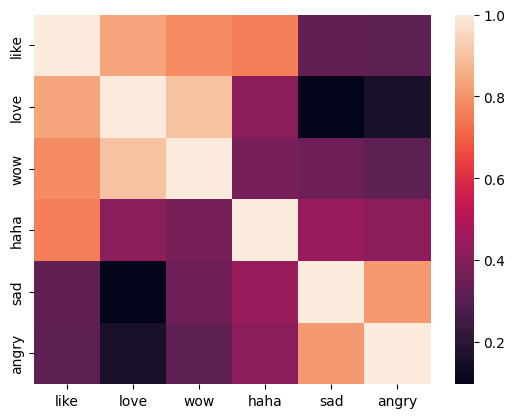

In [24]:
corrleation_df = pd.DataFrame({'like':df['reactions_like'], 'love': df['reactions_love'], 'wow': df['reactions_wow'], 'haha':df['reactions_haha'], 'sad':df['reactions_sad'], 'angry':df['reactions_angry']})
corrleation_plt = corrleation_df.corr()
round(corrleation_plt,2)
sns.heatmap(corrleation_plt)


- lược đồ tương quan giữa tổng reaction với tổng comments

<Axes: >

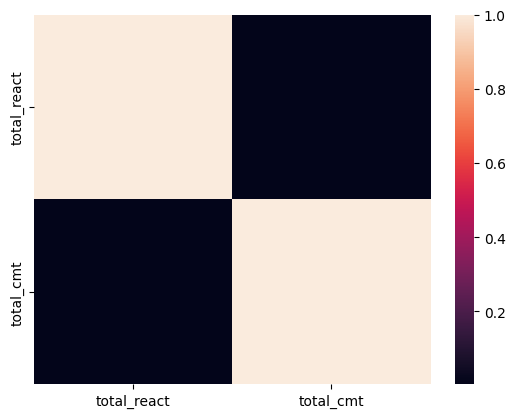

In [25]:
corrleation_dfc = pd.DataFrame({'total_react':df['total_of_reactions'], 'total_cmt':df['total_comments']})
corrleation_pltc = corrleation_dfc.corr()
round(corrleation_pltc,2)
sns.heatmap(corrleation_pltc)

## Tương quan giữa các bài viết có và không có video

In [26]:
no_video = df[df['len_video'] == '0']['len_video'].count()
video = 500 - no_video
series_video=[]
for i in range(video):
    series_video.append('có video')
for i in range(no_video):
    series_video.append('không video')   
plt_series = pd.Series(series_video)     

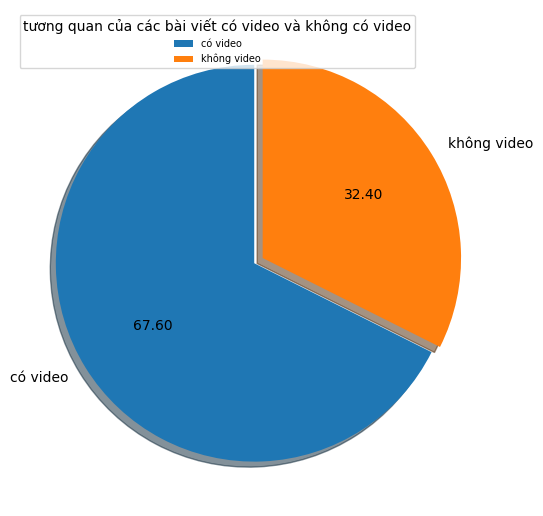

In [27]:
fig_video, ax_video = plt.subplots(1,1)
ax_video.pie(plt_series.value_counts(),shadow=True, labels=plt_series.value_counts().index, startangle=90, explode=(0.05,0),autopct='%.2f')
ax_video.legend(title = 'tương quan của các bài viết có video và không có video',loc=2,prop={'size':7})
fig_video.set_figheight(20)#checkpoint

$\rightarrow$ page này sử dụng video để làm nội dung chủ yếu và tạo ra sự hài hước, giải trí từ việc edit các video 

## Độ dài trung bình của video

- Hàm convert thời gian từ string về thời gian theo giây

In [98]:
def convert_to_time_sec(s):
    result = 0
    list_s = s.split(':')
    list_rev = list_s[::-1]
    try:
        for i in range(len(list_rev)):
            result += int(list_rev[i]) * (60**i)
    except:
        return result        
    return result

- thời gian trung bình của 1 video trong bài viết

In [101]:
df['len_video'].apply(convert_to_time_sec).mean()


40.724

# Phân tích thông tin về các user tham gia bình luận của các post 

## Lấy dữ liệu và tiền xử lí dữ liệu user

In [28]:
#lấy thông tin về người bình luận để phân tích
with open('user_data_js.json', 'r') as handler:
    rea = json.load(handler)
#lấy dữ liệu của user cho vào dataframe
id = []
first_name  = []
middle_name = []
last_name = []
birthday = []
gender = []
hometown = []
education = []
for i in rea:
    try:
        id.append(i['id'])
    except:
        id.append(np.NAN)    
    try:
        first_name.append(i['first_name'])
    except:
        first_name.append(np.NAN) 
    try:
        birthday.append(i['birthday'])
    except:
        birthday.append(np.NAN)         
    try:
        gender.append(i['gender'])
    except:
        gender.append(np.NAN) 
    try:
        hometown.append(i['hometown']['name'])
    except:
        hometown.append(np.NAN) 
    try:
        education.append(i['education'][0]['type'])
    except:
        education.append(np.NAN)     
    try:
        middle_name.append(i['middle_name'])
    except:
        middle_name.append(np.NAN) 
data_user_old = pd.DataFrame({'id': id, 'first_name':first_name, 'middle_name':middle_name,  'birthday': birthday, 'gender': gender, 'hometown':hometown, 'education':education })        


In [29]:
data_user_old.shape

(21293, 7)

- Xử lí missing_data cho data_user_old

In [30]:
data_user_old = data_user_old.dropna(how='all') # loại bỏ các bộ (các hàng toàn NaN)
data_user_old['education'] = data_user_old['education'].fillna("unknown") # xử lí NaN của education cho về hide (vì không có cách để suy luận trình độ của 1 người bất kì chỉ dựa vào các thông tin trên fb đưa ra)
data_user_old['birthday'] = data_user_old['birthday'].fillna("unknown")
data_user_old['hometown'] = data_user_old['hometown'].fillna("unknown")

In [31]:
data_user = data_user_old #lưu ý ở đây nên tạo 1 dataframe mới để về sau xử lí missing gender tốt hơn
data_user_old.shape

(21246, 7)

## Xử lí missing cho cột 'gender' trong data_user

In [32]:
data_user[pd.isna(data_user['gender'])] 
# có 202 user là không có giới tính

,id,first_name,middle_name,birthday,gender,hometown,education
51,100083853807574,Thố,NaN,unknown,NaN,unknown,unknown
63,100084510619977,Ebe,NaN,unknown,NaN,unknown,unknown
95,100051738106961,Trần,NaN,unknown,NaN,unknown,unknown
108,100037069233491,Thái,Nam,unknown,NaN,unknown,College
404,100094228137143,Trinh,NaN,unknown,NaN,unknown,unknown
...,...,...,...,...,...,...,...
20388,100011532728676,Ngan,NaN,unknown,NaN,unknown,unknown
20782,100070166976585,Yen Vy,NaN,unknown,NaN,unknown,unknown
20823,100041066621715,Giang,Thị,unknown,NaN,unknown,unknown
21082,100029270222389,Tâyy,NaN,06/01/1996,NaN,unknown,unknown


In [33]:
#xử lí NaN ở first_name và middle_name để dùng thuật toán Multinomial Naive Bayes dự đoán
data_user['first_name'] = data_user['first_name'].fillna('')
data_user['middle_name'] = data_user['middle_name'].fillna('')
#chèn thêm cột name từ cột first_name và middle_name
data_user['name'] = data_user['first_name']+' '+data_user['middle_name']

In [34]:

data_user[(pd.isna(data_user['gender'])) & (pd.notna(data_user['first_name']))] 
# thật tình cờ và cũng thật bất ngờ là tất cả 202 user không có giới tính lại đều có tên nên dự kiến sẽ dùng thuật toán Multinomial Naive Bayes để dự đoán gender của user

,id,first_name,middle_name,birthday,gender,hometown,education,name
51,100083853807574,Thố,,unknown,NaN,unknown,unknown,Thố
63,100084510619977,Ebe,,unknown,NaN,unknown,unknown,Ebe
95,100051738106961,Trần,,unknown,NaN,unknown,unknown,Trần
108,100037069233491,Thái,Nam,unknown,NaN,unknown,College,Thái Nam
404,100094228137143,Trinh,,unknown,NaN,unknown,unknown,Trinh
...,...,...,...,...,...,...,...,...
20388,100011532728676,Ngan,,unknown,NaN,unknown,unknown,Ngan
20782,100070166976585,Yen Vy,,unknown,NaN,unknown,unknown,Yen Vy
20823,100041066621715,Giang,Thị,unknown,NaN,unknown,unknown,Giang Thị
21082,100029270222389,Tâyy,,06/01/1996,NaN,unknown,unknown,Tâyy


In [35]:
#lấy thông tin về tên và giới tính của user đã rõ giới tính để dùng cho training và test
name_1 = list(data_user[pd.notna(data_user['gender'])]['name'].values) #dữ liệu dùng để dự đoán
gender_ = list(data_user[pd.notna(data_user['gender'])]['gender'].values) #nhãn của dữ liệu
#chuyển name_ về dạng ma trận dọc để thực hiện được thuật toán Multinomial Naive Bayes
CoV = CountVectorizer()
name_ = CoV.fit_transform(name_1)

name_train, name_test, gender_train, gender_test = train_test_split(name_, gender_)
Mul = MultinomialNB()
Mul.fit(name_train, gender_train)
Mul.score(name_test, gender_test)#xác suất đúng khoảng 80%


0.816194639802319

In [36]:
data_user.shape[0]

21246

In [37]:
new_gender = [] # list gender mới
for i in range (data_user.shape[0]):
    if( pd.isna(data_user.iloc[i]['gender'])):#nếu cột gender không xác định thì sử dụng thuật toán để dự đoán gender (nếu Nan ở cột name thì sẽ phải để cột gender là không xác định trong bộ dữ liệu này thì điều đó không xảy ra)
        print("%s : %s -> %s"%(data_user.iloc[i]['name'], data_user.iloc[i]['gender'], Mul.predict(CoV.transform([data_user.iloc[i]['name']]).toarray())[0]))
        new_gender.append(Mul.predict(CoV.transform([data_user.iloc[i]['name']]).toarray())[0])
        # data_user.iloc[i]['gender'] = Mul.predict(CoV.transform([data_user.iloc[i]['name']]).toarray())[0]
    else:
        new_gender.append(data_user.iloc[i]['gender']) 
len(new_gender)        

Thố  : nan -> male
Ebe  : nan -> male
Trần  : nan -> male
Thái Nam : nan -> male
Trinh  : nan -> female
Trang  : nan -> female
Ming  : nan -> male
Băng  : nan -> female
Quyền  : nan -> male
Vũ  : nan -> male
Thúy  : nan -> female
Vangg  : nan -> female
Hà  : nan -> female
Bò  : nan -> male
Chun Anh : nan -> male
Phương  : nan -> female
Lait  : nan -> male
Trực  : nan -> male
Gia  : nan -> male
An Ngoc : nan -> female
Thanh  : nan -> male
Ha  : nan -> female
Tới  : nan -> male
Linh  : nan -> female
Phạm  : nan -> male
Duyen Van : nan -> female
Linh  : nan -> female
Phương  : nan -> female
Ly  : nan -> female
Lâm Thanh : nan -> male
Ngọc  : nan -> female
Ng  : nan -> male
Hậu  : nan -> male
Bella  : nan -> male
Tuấn Anh : nan -> male
Hùng  : nan -> male
Mỹ  : nan -> female
Thuy🐽💤 Thuy : nan -> female
Kiệt  : nan -> male
Thái  : nan -> male
Trâm  : nan -> female
Tai  : nan -> male
Thanh Niên  : nan -> male
Bảo Duy : nan -> male
Ben  : nan -> male
Tiến Mạnh : nan -> male
Ngyên Vănn : nan -

21246

In [38]:
#thay đổi các giá trị của data_user['gender'] = new_gender
data_user['gender'] = new_gender

In [39]:
#kiểm tra xem có bộ nào còn Nan ở cột Gender hay không
data_user[pd.isna(data_user['gender'])].shape[0]

0

- Tương quan về giới tính của các user_comment

Text(0, 0.5, 'Quantity')

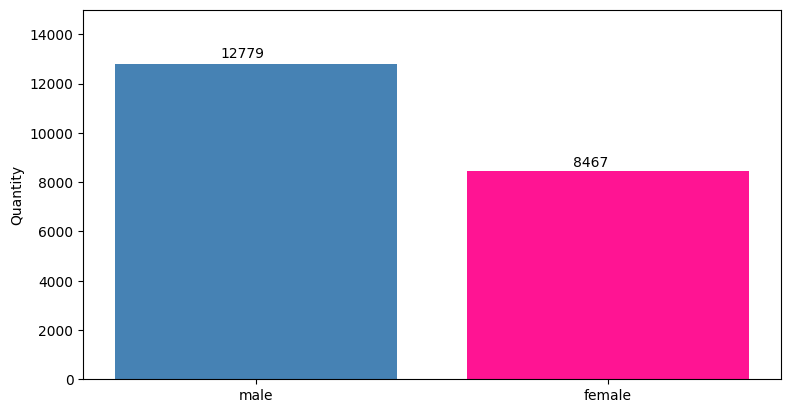

In [41]:
fig_mf, ax_mf = plt.subplots(1,1)
ax_mf.bar(data_user['gender'].value_counts().index, data_user['gender'].value_counts().values, color = ['steelblue','deeppink'])
fig_mf.set_figwidth(9)
ax_mf.set_ylim(0,15000)
for p in ax_mf.patches:
    ax_mf.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.02))
ax_mf.set_ylabel("Quantity")

$\rightarrow$ số lượng nam trong page nhiều áp đảo so với số lượng nữ 

- User có số lượt bình luận lớn nhất trong bộ dữ liệu

In [42]:

list_user_comment = []
with open('file_user_id_comment_list.txt','r') as handler:
    list_user_comment = handler.readlines()
#xử lí làm sạch loại bỏ các kí tự "\n" trong list_user_comment
for i in range(len(list_user_comment)):
    list_user_comment[i] = list_user_comment[i][:list_user_comment[i].find("\n")]
#cho vào series để tìm ra user_id xuất hiện nhiều nhất  
print(pd.Series(list_user_comment).value_counts().head(1))  
frequency_user = pd.Series(list_user_comment).value_counts().head(1).values[0]
id_most = pd.Series(list_user_comment).value_counts().head(1).index[0]
#data user có lượt bình luận nhiều nhất
data_user[data_user['id'] == id_most]

100058231838069    1136
Name: count, dtype: int64


,id,first_name,middle_name,birthday,gender,hometown,education,name
17104,100058231838069,Nam,,unknown,male,Cà Mau,High School,Nam


$\rightarrow$ đến cả user bình luận nhiều nhất cũng tên là Nam và giới tính là nam

## Xử lí chuẩn hóa hometown

In [43]:
old_hometown  = set(data_user['hometown'].values)
new_hometown = []
handle_hometown = []
for i in old_hometown:
    if i != 'unknown':
        try:
            geolocator_ = Nominatim(user_agent="handle_home_town")
            couple = {i:str(geolocator_.geocode(i))}
            if(str(geolocator_.geocode(i)) != 'None'):
                new_hometown.append(couple)
                print(couple)
            else:
                handle_hometown.append(i) 
        except:
            handle_hometown.append(i)
            print("lỗi nè")

{'Buôn Ma Thuột': 'Buôn Ma Thuột, Tỉnh Đăk Lăk, 63107, Việt Nam'}
{'Nghia Hung': 'Huyện Nghĩa Hưng, Tỉnh Nam Định, 41000, Việt Nam'}
{'Yen Thuy': 'Yên Thủy, Tỉnh Hòa Bình, Việt Nam'}
{'My Loc': 'my loc, Cagayan Valley Road, Maguinao, Purok 3, Sampaloc, San Rafael, Bulacan, Central Luzon, 3008, Philippines'}
{'Madrid, Spain': 'Madrid, Comunidad de Madrid, España'}
{'Nha Trang': 'Thành phố Nha Trang, Tỉnh Khánh Hòa, Việt Nam'}
{'Dong Giang': '榕江县, 黔东南苗族侗族自治州, 贵州省, 中国'}
{'Soc Trang': 'Tỉnh Sóc Trăng, Việt Nam'}
{'Dehui': '德惠市, 长春市, 吉林省, 130000, 中国'}
{'Mỏ Cày': 'Thị trấn Mỏ Cày, Huyện Mỏ Cày Nam, Tỉnh Bến Tre, Việt Nam'}
{'Duc Trach, Ha Son Binh, Vietnam': 'Trung Đức hotel, Quốc lộ 9G, Phong Nha, Bố Trạch, Tỉnh Quảng Bình, 511860, Việt Nam'}
{'Lào Cai': 'Tỉnh Lào Cai, Việt Nam'}
{'Santiago de Cali': 'Perímetro Urbano Santiago de Cali, Cali, Sur, Valle del Cauca, RAP Pacífico, Colombia'}
{'Mỹ Hào': 'Mỹ Hào, Tỉnh Hưng Yên, 03213, Việt Nam'}
{'Dong Hoa': 'Phường Đông Hòa, Dĩ An, Thành phố Dĩ 

- Hàm lấy tên tỉnh (hoặc thành phố nếu có) của địa điểm

In [44]:
def split_city(s):
    list_s = s.split(",")
    for i in list_s:
        if(i.find("Tỉnh")!=-1 ):
            return(i)
        if(i.find("Thành phố") != -1):
            return(i)
    return "foreign_country"    

In [45]:
new_hometown

[{'Buôn Ma Thuột': 'Buôn Ma Thuột, Tỉnh Đăk Lăk, 63107, Việt Nam'},
 {'Nghia Hung': 'Huyện Nghĩa Hưng, Tỉnh Nam Định, 41000, Việt Nam'},
 {'Yen Thuy': 'Yên Thủy, Tỉnh Hòa Bình, Việt Nam'},
 {'My Loc': 'my loc, Cagayan Valley Road, Maguinao, Purok 3, Sampaloc, San Rafael, Bulacan, Central Luzon, 3008, Philippines'},
 {'Madrid, Spain': 'Madrid, Comunidad de Madrid, España'},
 {'Nha Trang': 'Thành phố Nha Trang, Tỉnh Khánh Hòa, Việt Nam'},
 {'Dong Giang': '榕江县, 黔东南苗族侗族自治州, 贵州省, 中国'},
 {'Soc Trang': 'Tỉnh Sóc Trăng, Việt Nam'},
 {'Dehui': '德惠市, 长春市, 吉林省, 130000, 中国'},
 {'Mỏ Cày': 'Thị trấn Mỏ Cày, Huyện Mỏ Cày Nam, Tỉnh Bến Tre, Việt Nam'},
 {'Duc Trach, Ha Son Binh, Vietnam': 'Trung Đức hotel, Quốc lộ 9G, Phong Nha, Bố Trạch, Tỉnh Quảng Bình, 511860, Việt Nam'},
 {'Lào Cai': 'Tỉnh Lào Cai, Việt Nam'},
 {'Santiago de Cali': 'Perímetro Urbano Santiago de Cali, Cali, Sur, Valle del Cauca, RAP Pacífico, Colombia'},
 {'Mỹ Hào': 'Mỹ Hào, Tỉnh Hưng Yên, 03213, Việt Nam'},
 {'Dong Hoa': 'Phường Đ

- Xử lí lấy địa điểm bằng tên tỉnh(hoặc thành phố nếu có) 

In [46]:
test_home_town = {}
for i in new_hometown:
    key = str(list(i.keys())[0])
    test_home_town[key] = split_city(str(list(i.values())[0]))
    test_home_town[key]

In [47]:
test_home_town

{'Buôn Ma Thuột': ' Tỉnh Đăk Lăk',
 'Nghia Hung': ' Tỉnh Nam Định',
 'Yen Thuy': ' Tỉnh Hòa Bình',
 'My Loc': 'foreign_country',
 'Madrid, Spain': 'foreign_country',
 'Nha Trang': 'Thành phố Nha Trang',
 'Dong Giang': 'foreign_country',
 'Soc Trang': 'Tỉnh Sóc Trăng',
 'Dehui': 'foreign_country',
 'Mỏ Cày': ' Tỉnh Bến Tre',
 'Duc Trach, Ha Son Binh, Vietnam': ' Tỉnh Quảng Bình',
 'Lào Cai': 'Tỉnh Lào Cai',
 'Santiago de Cali': 'foreign_country',
 'Mỹ Hào': ' Tỉnh Hưng Yên',
 'Dong Hoa': ' Thành phố Dĩ An',
 'Trà Ôn': ' Tỉnh Vĩnh Long',
 'Bao Yen': ' Tỉnh Lào Cai',
 'Long My, Cẩn Thỏ, Vietnam': ' Thành phố Cần Thơ',
 'Van Ninh': 'foreign_country',
 'Móng Cái, Vietnam': 'Thành phố Móng Cái',
 'Rach Gia': 'Thành phố Rạch Giá',
 'Tho Xuan': ' Thành phố Hà Nội',
 'Tan Trach, Vietnam': ' Tỉnh Long An',
 'Annandale, Virginia': 'foreign_country',
 'Hoàng Xá, Phú Thọ, Vietnam': ' Tỉnh Phú Thọ',
 'Hanoi, Vietnam': 'Thành phố Hà Nội',
 'My Yen, Long An, Vietnam': ' Tỉnh Long An',
 'Lai Chau': 'Tỉ

In [48]:
#lưu vào file json
with open("fix_local.json",'w',encoding='utf8') as handler:
    json.dump(test_home_town,handler)


## Làm sạch data_user

In [49]:

data_hometown = list(data_user['hometown'].values) # list hometown mới 
for i in range(len(data_hometown)):
    if data_hometown[i]!= 'unknown':
        try:
            data_hometown[i] = test_home_town[data_hometown[i]]
        except:
            data_hometown[i] = 'unknown'     

- gán data_user['hometown'] bằng series đã làm sạch

In [50]:
data_user['hometown'] = data_hometown

- Data_user đã được làm sạch

| Các trường dữ liệu | Kiểu dữ liệu | Mô tả về dữ liệu | 
| --- | --- | --- |
| id | string | id của user | 
| first_name | string | tên của user |
| middle_name | string | tên đệm của user |
| birthday | string | ngày sinh của user | 
| gender | string | giới tính của user | 
| hometown | string | quê quán của user | 
| education | string | học vấn của user |
| name | string | tên gồm first_name và middle_name của user |

In [51]:
data_user

,id,first_name,middle_name,birthday,gender,hometown,education,name
0,100048894999974,Đăng,,11/05,male,unknown,unknown,Đăng
1,1307607897,Tiến,Văn,unknown,male,unknown,College,Tiến Văn
2,100069682896950,Diệu,,unknown,male,Tỉnh Vĩnh Long,College,Diệu
3,100046252582084,Việt,,unknown,male,Tỉnh Quảng Trị,unknown,Việt
4,100009530645744,Ngọc,,unknown,female,Thành phố Cần Thơ,High School,Ngọc
...,...,...,...,...,...,...,...,...
21288,100041007607132,Tùng,Hữu,10/10/2000,male,foreign_country,College,Tùng Hữu
21289,100006443355627,Thuy,,unknown,female,foreign_country,unknown,Thuy
21290,100042847903860,Nguyễn Hoàng,,unknown,male,Thành phố Biên Hòa,unknown,Nguyễn Hoàng
21291,100030990153209,VT,,unknown,male,Tỉnh Khánh Hòa,College,VT


## Hometown của các user

In [55]:
data_user['hometown'].value_counts().head(30)

hometown
unknown                  9862
foreign_country           889
Thành phố Hà Nội          889
Thành phố Hồ Chí Minh     793
Tỉnh Thanh Hóa            311
Thành phố Hải Phòng       307
 Tỉnh Nghệ An             254
Tỉnh Hải Dương            254
 Tỉnh Nam Định            242
Tỉnh Thái Bình            206
Tỉnh Cà Mau               194
Tỉnh Bắc Giang            189
Thành phố Cần Thơ         189
 Tỉnh Ninh Bình           172
Tỉnh Sóc Trăng            154
 Tỉnh Tiền Giang          152
 Tỉnh Thái Bình           151
Tỉnh Bắc Ninh             141
Tỉnh Bến Tre              138
 Thành phố Đà Nẵng        136
Tỉnh Thái Nguyên          136
Thành phố Hưng Yên        135
Tỉnh Hà Tĩnh              134
Tỉnh Vĩnh Long            130
Thành phố Đà Nẵng         128
 Tỉnh Bình Định           125
 Thành phố Hà Nội         123
Thành phố Huế             120
 Tỉnh Đồng Nai            116
 Tỉnh Phú Thọ             114
Name: count, dtype: int64

Text(0, 0.5, 'hometown')

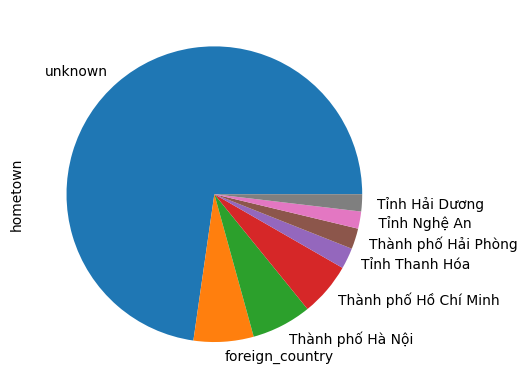

In [53]:
data_user['hometown'].value_counts().head(8).plot(kind='pie').set_ylabel("hometown")

$\rightarrow$ số lượng các user họat động trong page có đủ cả 3 miền Bắc Trung Nam , và cả hải ngoại

## Trình độ học vấn của user_comment

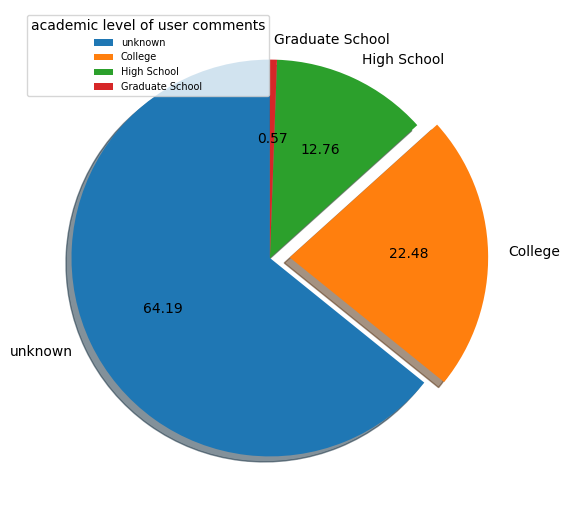

In [54]:
fig_ac, ax_ac = plt.subplots(1,1)
ax_ac.pie(data_user['education'].value_counts(),labels=data_user['education'].value_counts().index,shadow=True,startangle=90, explode=(0,0.1,0,0),autopct='%.2f')
ax_ac.legend(title = 'academic level of user comments',loc=2,prop={'size':7})
fig_ac.set_figheight(20)#checkpoint

$\rightarrow$ phần lớn các user hoạt động trong page mà để phần học vấn là public là cao đẳng, đại học 

# Kết Luận

- Kết luận:
$\newline$ $\enspace$•	Page này là 1 page đăng những bài viết hài hước để thu hút người xem và tương tác
$\newline$ $\enspace$•	Page sử dụng loại video ngắn với thời gian trung bình cho 1 video khoảng 40 giây giống như các video trên tiktok nhằm thu hút được nhiều user trẻ, có tiềm năng mua hàng quảng cáo 
$\newline$ $\enspace$•	Page có sử dụng buff tương tác và quảng cáo của page đang không nhiều nên đây là 1 page đang phát triển, không muốn spam quảng cáo nhiều tránh làm mất lượng user hoạt động trong page
$\newline$ $\enspace$•	Đối tượng mà page nhắm đến là khoảng trên 16 tuổi (từ trẻ vị thành niên trở lên), những người từ đã có nhận thức đến đã đủ nhận thức về xã hội
$\newline$ $\enspace$•	Hastag mà page hay dùng nhiều nhất là #anhdaden , tìm kiếm trên facebook thấy 1 page là Anh Da Đen và có 3.7 triệu lượt theo dõi https://www.facebook.com/anhdadenchuanmen thì đây là 1 page cũng có các bài viết có kiểu nội dung giống với page này, 2 page có chung 1 email quảng cáo là  anhdadenqc@gmail.com nên đây là 2 page của cùng 1 admin , page Anh Da Đen thì feed nào cũng có 1 comment quảng cáo shopee ở đầu comments , vậy nên admin này dùng 1 page để quảng cáo là page Anh Da Đen và 1 page Anh Da Vàng để buff lượng reactions, luôn để hastag là #anhdaden để  thu hút user truy cập page Anh Da Đen để quảng cáo trên page Anh Da Đen
$\newline$ $\enspace$•	Hiện tại thì các bài đăng của page này đủ hài hước để các user vào giải trí 
